In [10]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
parquet_file= r'C:\Users\verma\OneDrive\Desktop\PYTHON_DATA_PROJECT\1_Data_science_job_postings_dataset\0000.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)

In [11]:
df_new = df[df['job_title_short'] == 'Data Analyst'].copy()
df_new['job_month'] = df_new['job_posted_date'].dt.strftime('%b')
df_exploded = df_new.explode('job_skills')

In [12]:
df_pivot = df_exploded.pivot_table(index='job_month', columns='job_skills', aggfunc='size', fill_value=0)

In [13]:
top_5_skills =df_exploded['job_skills'].value_counts(ascending=False).head().index.to_list()

In [14]:
df_pivot_2 = df_pivot[top_5_skills]
df_pivot_3 = df_pivot_2.reset_index()

In [15]:
df_pivot_3['month_no'] = pd.to_datetime(df_pivot_3['job_month'], format='%b').dt.month.copy()
pivot_final = df_pivot_3.sort_values(by='month_no',ascending=True).copy()
pivot_final.set_index('job_month', inplace=True)

In [16]:
pivot_final.drop(columns='month_no', inplace=True)
pivot_final

job_skills,sql,excel,python,tableau,power bi
job_month,,,,,
Jan,11336,8170,6606,5596,4285
Feb,7947,5772,4751,3936,3307
Mar,7868,5675,4741,4051,3176
Apr,7553,5496,4557,3776,3106
May,6617,4773,4070,3245,2695
Jun,7584,5724,4707,3812,3275
Jul,7687,5513,4831,3928,3350
Aug,8823,6482,5576,4533,3859
Sep,6829,4886,4229,3446,3118


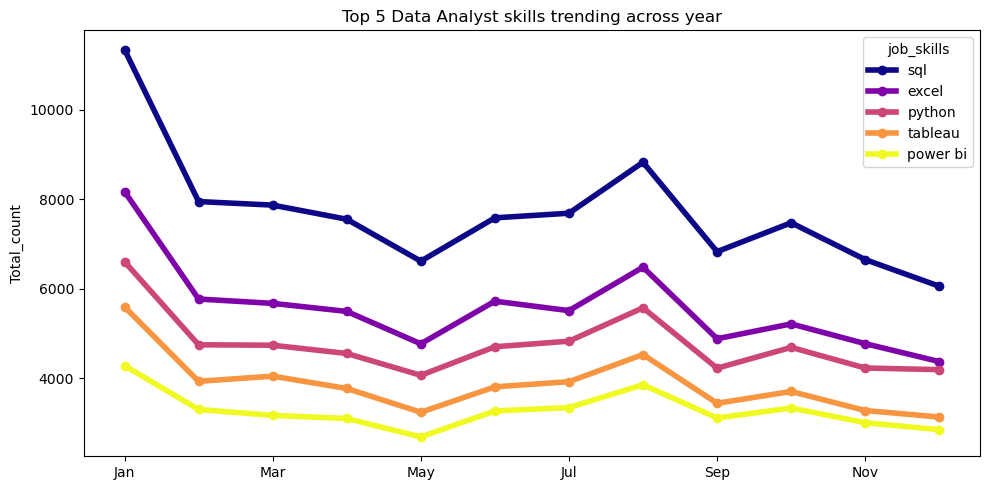

In [43]:
pivot_final.plot(kind='line', marker='o', figsize= (10,5), linewidth = 4, colormap = 'plasma')
plt.xlabel('')
plt.ylabel('Total_count')
plt.title('Top 5 Data Analyst skills trending across year')
plt.tight_layout()